# Thank you for visiting my Notebook.
# I'm look forward to your high evaluation.
# If you have any suggestions for improvement, please feel free to comment¶

In [67]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

pd.set_option("display.max_columns",None)

# Loading Data

In [68]:
df = pd.read_csv("/kaggle/input/google-news-sports/news_dataset.csv")
print(df.shape)
df.head(3)

(92199, 3)


,Headline,Sport,Date
0,Live Cricket Scores | Cricket Live Score ball ...,Cricket,2023-09-15
1,QAT vs BAH Dream11 Prediction Today Match 2 Gu...,Cricket,2023-09-15
2,"Meet Shubman Gill’s father Lakhwinder Singh, c...",Cricket,2023-09-15


# Observation Data

In [69]:
df.describe()

,Headline,Sport,Date
count,92199,92199,92199
unique,40614,28,35
top,Today's Horse Racing Tips from James Boyle,Formula1,2023-09-29
freq,69,3468,5164


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92199 entries, 0 to 92198
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Headline  92199 non-null  object
 1   Sport     92199 non-null  object
 2   Date      92199 non-null  object
dtypes: object(3)
memory usage: 2.1+ MB


In [71]:
df["Sport"].value_counts()

Sport
Formula1             3468
MMA                  3464
Basketball           3413
Tae Kwon Do          3392
Snowboarding         3386
Wrestling            3367
Badminton            3356
Surfing              3351
Rugby                3351
Boxing               3351
Cricket              3345
Gymnastics           3345
American Football    3327
Volleyball           3325
Archery              3324
Athletics            3313
Football             3301
Skiing               3300
Golf                 3284
Baseball             3283
Esports              3282
Tennis               3245
Cycling              3222
Fencing              3215
Horse Racing         3173
Swimming             3162
Ice Hockey           3117
Table Tennis         2737
Name: count, dtype: int64

<Axes: xlabel='Sport'>

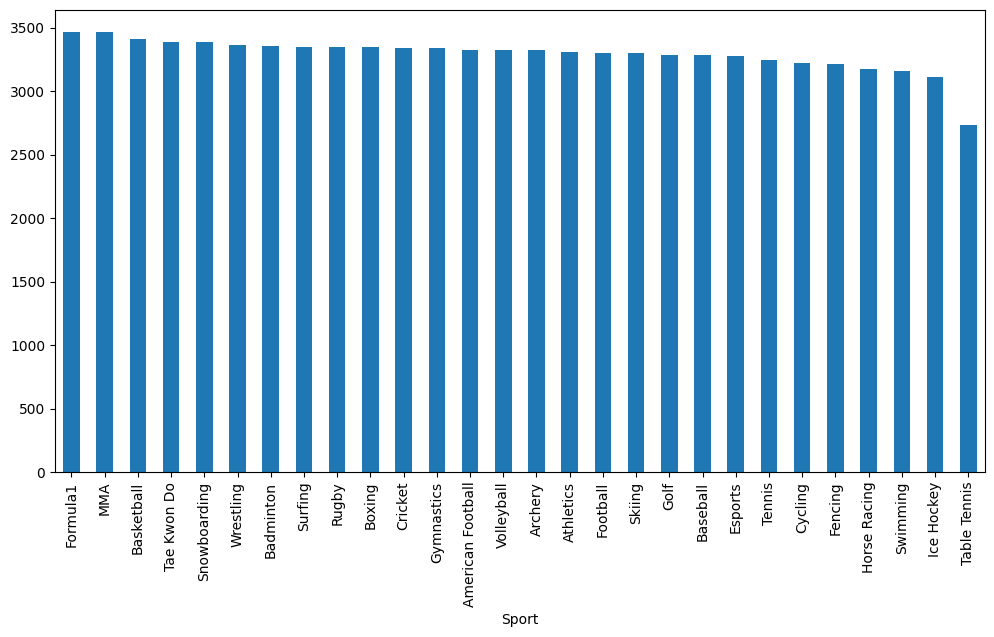

In [72]:
plt.figure(figsize=(12,6))
data = df['Sport'].value_counts()
data.plot(kind='bar')

In [73]:
from collections import Counter

di = {}
def count(df):
    words = df.split()
    c = Counter(words)
    for word,n in c.items():
        try:
            di[word] += n
        except:
            di[word] = n
df['Headline'].apply(count)
di = sorted(di.items(), key=lambda x:x[1], reverse=True)

In [79]:
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = stopwords.words('english')

DICT = {}

n = 0
for i in range(len(di)):
    word, c = di[i][0],di[i][1]
    if word in stop_words:
        continue
    else:
        DICT[word] = c
        n += 1
    if n >= 100:
        break

new_df = pd.DataFrame(DICT,index=["count"])

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [80]:
new_df = new_df.T

In [81]:
new_df

,count
...,27114
World,7736
-,6809
2023,6628
Asian,4946
...,...
badminton,905
vs.,896
Top,892
esports,883


In [77]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, ... to Surfing
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   word    100 non-null    int64
 1   count   100 non-null    int64
dtypes: int64(2)
memory usage: 6.4+ KB


<Axes: ylabel='count'>

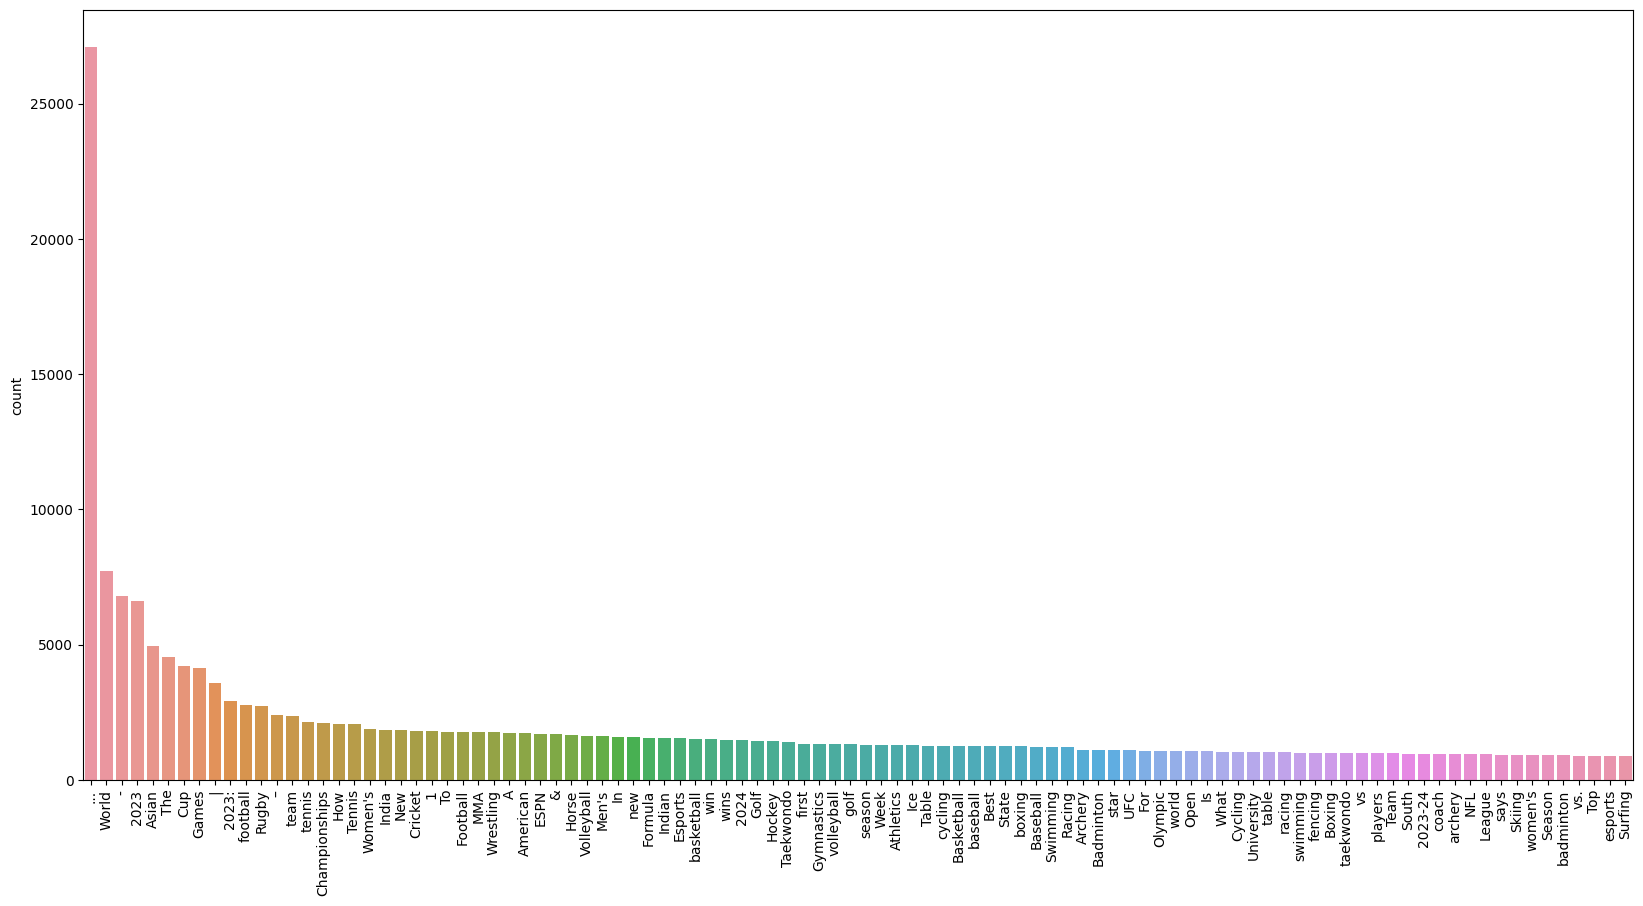

In [86]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.barplot(x=new_df.index,y=new_df["count"])